In [1]:
# Install if missing
# %pip install pandas numpy matplotlib seaborn scikit-learn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

%matplotlib inline
sns.set_style("whitegrid")


In [2]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
X.head()


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


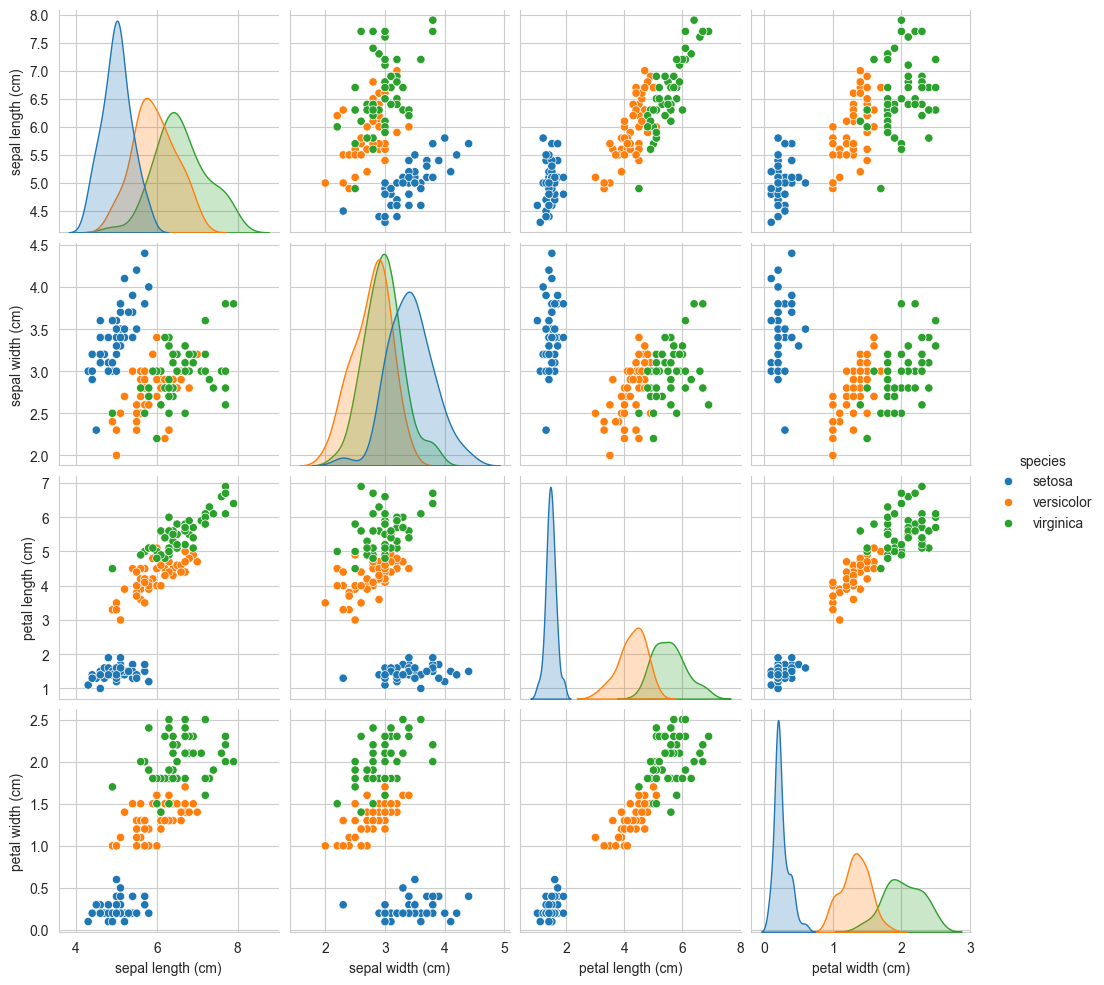

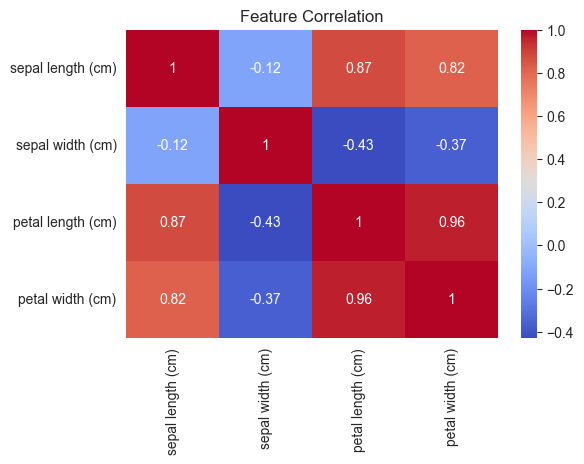

In [3]:
# Pairplot to visualize class separation
iris_df = X.copy()
iris_df['species'] = y.replace(dict(enumerate(iris.target_names)))

sns.pairplot(iris_df, hue="species", diag_kind="kde")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (120, 4) Test shape: (30, 4)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))



Logistic Regression Accuracy: 0.93
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Decision Tree Accuracy: 0.93
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90

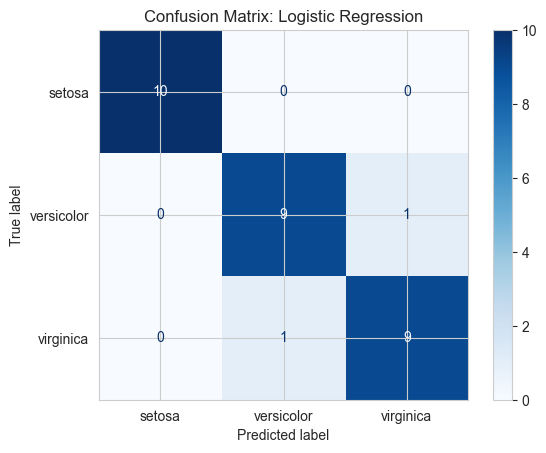

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

if best_model_name == "Logistic Regression":
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=iris.target_names,
                                        cmap="Blues",
                                        values_format="d")
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()


In [8]:
joblib.dump(best_model, "iris_model.pkl")
print("✅ Best model saved as iris_model.pkl")


✅ Best model saved as iris_model.pkl


In [9]:
# Example: Sepal length=5.1, Sepal width=3.5, Petal length=1.4, Petal width=0.2
sample = np.array([[5.1, 3.5, 1.4, 0.2]])

if best_model_name == "Logistic Regression":
    sample_scaled = scaler.transform(sample)
    prediction = best_model.predict(sample_scaled)[0]
else:
    prediction = best_model.predict(sample)[0]

print("🌸 Predicted species:", iris.target_names[prediction])


🌸 Predicted species: setosa


C:\Users\sji12\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
